In [1]:
import pandas as pd
import os
import re
import csv
import numpy as np

In [2]:
def clean(line):
    # line = line.strip().replace("newline_char", "||||||||||||||||||||||||||||")
    # line = line.strip().replace("newline_char", " ")
    line = line.strip()
    line = line.replace("( opens in new window )", "")
    line = line.replace("click to email this to a friend", "")
    line = line.replace("lick to share on whatsapp", "")
    line = line.replace("click to share on facebook", "")
    line = line.replace("share on facebook", "")
    line = line.replace("click to share on twitter", "")
    line = line.replace("click to share on pinterest", "")
    line = line.replace("click to share on tumblr", "")
    line = line.replace("click to share on google+", "")
    line = line.replace("feel free to share these resources in your social "
                        "media networks , websites and other platforms", "")
    line = line.replace("share share tweet link", "")
    line = line.replace("e-mail article print share", "")
    line = line.replace("read or share this story :", "")
    line = line.replace("share the map view in e-mail by clicking the share "
                        "button and copying the link url .     embed the map "
                        "on your website or blog by getting a snippet of html "
                        "code from the share button .     if you wish to "
                        "provide feedback or comments on the map , or if "
                        "you are aware of map layers or other "
                        "datasets that you would like to see included on our maps , "
                        "please submit them for our evaluation using this this form .", "")
    line = line.replace("share this article share tweet post email", "")
    line = line.replace("skip in skip x embed x share close", "")
    line = line.replace("share tweet pin email", "")
    line = line.replace("share on twitter", "")
    line = line.replace("feel free to weigh-in yourself , via"
                        "the comments section . and while you ’ "
                        "re here , why don ’ t you sign up to "
                        "follow us on twitter us on twitter .", "")
    line = line.replace("follow us on facebook , twitter , instagram and youtube", "")
    line = line.replace("follow us on twitter", "")
    line = line.replace("follow us on facebook", "")
    line = line.replace("play facebook twitter google plus embed", "")
    line = line.replace("play facebook twitter embed", "")
    line = line.replace("enlarge icon pinterest icon close icon", "")
    line = line.replace("follow on twitter", "")
    line = line.replace("autoplay autoplay copy this code to your website or blog", "")
    return line

In [3]:
def clean_str(s):
    s = s.lower()
    s = s.strip()
    s = s.replace('<unk>','')
    s = s.replace('`', '')
    s = s.replace('.', '')
    s = s.replace(',', '')
    s = s.replace(';', '')
    s = s.replace('\'', '')
    s = s.replace('\"', '')
    s = s.replace('(', '')
    s = s.replace(')', '')
    s = s.replace('-', ' ')
    s = s.replace('<p>', '')
    s = s.replace('</p>', '')
    s = s.replace('<t>', '')
    s = s.replace('</t>', '')
    s = s.replace('[!@#$]', '')
    s = s.replace('– ', '')
    s = s.replace('  ', ' ')
    return s

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
'''
input: [summary, paragraph1, paragraph2, paragraph3, ...]
output: [1, tf-idf of paragraph 1, tf-idf of paragraph2, tf-idf of paragraph3, ...]
'''
def calculate_tfidf(summary, paragraphs):
  # train_set = [summary] + paragraphs
  # print(len(train_set))
  tfidf_vectorizer = TfidfVectorizer()
  tfidf_matrix = tfidf_vectorizer.fit_transform(paragraphs)

  summary_vec = tfidf_vectorizer.transform(summary)

  similarity = cosine_similarity(summary_vec, tfidf_matrix)

  return similarity[0]

In [ ]:
!gdown 1ScGIcY_TcaIY57q9xdCQmi2EVAbmjHed #train.src

Downloading...
From: https://drive.google.com/uc?id=1ScGIcY_TcaIY57q9xdCQmi2EVAbmjHed
To: /content/train.src
100% 550M/550M [00:05<00:00, 100MB/s] 


In [ ]:
!gdown 1iP2yUNI4-wkJvCMl-RsKBK9rJkEfnZdM #train.tgt

Downloading...
From: https://drive.google.com/uc?id=1iP2yUNI4-wkJvCMl-RsKBK9rJkEfnZdM
To: /content/train.tgt
100% 58.8M/58.8M [00:00<00:00, 88.7MB/s]


In [4]:
# download test.src
!gdown 1_eixB51Mrgyttq-Ke4hI5czcggTBhvXf

Downloading...
From: https://drive.google.com/uc?id=1_eixB51Mrgyttq-Ke4hI5czcggTBhvXf
To: /content/test.src
100% 69.4M/69.4M [00:01<00:00, 44.1MB/s]


In [5]:
# download test.tgt
!gdown 1Y56DFe5FROz9ikkYtEEAGcPBevV1IZa6

Downloading...
From: https://drive.google.com/uc?id=1Y56DFe5FROz9ikkYtEEAGcPBevV1IZa6
To: /content/test.tgt
100% 7.31M/7.31M [00:00<00:00, 54.2MB/s]


In [6]:
# list of dictionary
# each topic has attributes: 
# articles: list[str]
# paragraphs: list[list[str]] // each article is parsed into paragraphs
# summary: str
topics = []
src = 'test'

In [7]:
#get article
with open('./' + src + '.src') as file:
    raw = file.read()
    raw = clean(raw)
    
    topics = [{'articles': list(filter(str.strip, clean_str(articles).split('|||||')))} for articles in raw.split('\n')] # topics = [topic1, topic2, topic3, ...]
    
    print('total topics: ', len(topics)) #train / val - 5622 topics
    print('first topic has acticles: ', len(topics[0]["articles"]))
    
    for topic in topics:
        topic['paragraphs'] = [list(filter(str.strip, article.split("newline_char"))) for article in topic["articles"]]
        topic['articles'] = [article.replace("newline_char", '') for article in topic['articles']]
    file.close()

total topics:  5622
first topic has acticles:  2


In [8]:
#get summary
with open('./' + src + '.tgt') as file:
    raw = file.read()
    raw = clean_str(raw)
    
    summaries = raw.split('\n')
    
    for topic, summary in zip(topics, summaries):
        topic['summary'] = summary
    
    file.close()

In [ ]:
import pprint as pp
pp.pprint(topics[0])

{'articles': ['national archives   yes it’s that time again folks it’s the '
              'first friday of the month when for one ever so brief moment the '
              'interests of wall street washington and main street are all '
              'aligned on one thing: jobs   a fresh update on the us '
              'employment situation for january hits the wires at 8:30 am new '
              'york time offering one of the most important snapshots on how '
              'the economy fared during the previous month expectations are '
              'for 203000 new jobs to be created according to economists '
              'polled by dow jones newswires compared to 227000 jobs added in '
              'february the unemployment rate is expected to hold steady at '
              '83%   here at marketbeat hq we’ll be offering color commentary '
              'before and after the data crosses the wires feel free to weigh '
              'in yourself via the comments section and while yo

In [12]:
# read data from the csv file (from the location it is stored)

max_sim = [] # maximum similarity paragraph index, ratio, similarity
sec_max_sim = [] # second maximum similarity paragraph index, ratio, similarity
min_sim = [] # minimum similarity paragraph index, ratio, similarity
std_dist = [] # paragraph similarity std
res_art = []
res_summ = []

art_len = 0
summ_len = 0
para_num = 0

for i, topic in enumerate(topics):
  # if i > 100:
  #   break
  
  summary = topic['summary']
  article = topic['articles'][0]
  paragraphs = topic['paragraphs'][0]

  #threshold to remove short articles with long summaries as well as articles with no summary
  if len(summary) < (0.75*len(article)) and len(paragraphs) > 2:
        if i % 1000 == 0:
          print(i)

        res_art.append(article)
        res_summ.append(summary)
        art_len += len(article)
        summ_len += len(summary)
        para_num += len(paragraphs)


        # #get tfidf similarity
        # similarity = calculate_tfidf(np.array([summary]), np.array(paragraphs))

        # i = similarity.argsort()[::-1][0]

        # max_sim.append({'similarity': similarity[i], 'index': i, 'ratio': (i+1)/(len(paragraphs)+1)})

        # j = similarity.argsort()[::-1][1]
        # sec_max_sim.append({'similarity': similarity[j], 'index': j, 'ratio': (j+1)/(len(paragraphs)+j)})

        # k = similarity.argsort()[0]
        # min_sim.append({'similarity': similarity[k], 'index': k, 'ratio': (k+1)/(len(paragraphs)+k)})

        # std_dist.append(np.array(similarity).std)

print('finished')

0
1000
2000
4000
5000
finished


In [10]:
art_len / len(res_art)

4761.229355488419

In [11]:
summ_len / len(res_summ)

1232.8006042296072

In [13]:
para_num / len(res_art)

22.627139979859013

In [ ]:
i = 341
print(max_sim[i], sec_max_sim[i], min_sim[i])

{'similarity': 0.5601493768140701, 'index': 8, 'ratio': 0.5625} {'similarity': 0.4867035826066008, 'index': 7, 'ratio': 0.36363636363636365} {'similarity': 0.0, 'index': 2, 'ratio': 0.17647058823529413}


total acticles:  0
mean std:  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


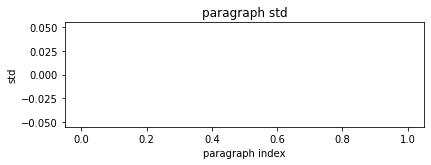

In [ ]:
import matplotlib.pyplot as plt
import math

print('total acticles: ', len(std_dist))
print('mean std: ', np.array(std_dist).mean())

plt.subplot(2, 1, 1)
plt.hist(std_dist, bins = 10)
plt.title('paragraph std')
plt.xlabel('paragraph index')
plt.ylabel('std')

plt.tight_layout()
plt.show()

total acticles:  31941
avg index:  8.25378040762656
avg ratio:  0.40547966808689
std of ratio:  0.2526194464464942


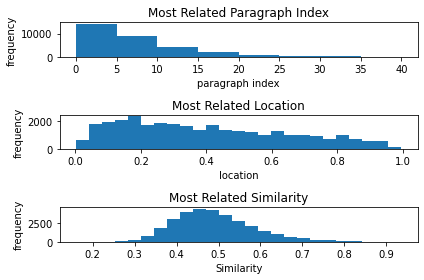

In [ ]:
print('total acticles: ', len(max_sim))
print('avg index: ', np.array([d['index'] for d in max_sim]).mean())
print('avg ratio: ', np.array([d['ratio'] for d in max_sim]).mean())
print('std of ratio: ', np.array([d['ratio'] for d in max_sim]).std())

plt.subplot(3, 1, 1)
plt.hist([d['index'] for d in max_sim], bins = [0,5,10,15,20,25,30,35,40])
plt.title('Most Related Paragraph Index')
plt.xlabel('paragraph index')
plt.ylabel('frequency')


plt.subplot(3, 1, 2)
plt.hist([d['ratio'] for d in max_sim], bins = 25)
plt.title('Most Related Location')
plt.xlabel('location')
plt.ylabel('frequency')

plt.subplot(3, 1, 3)
plt.hist([d['similarity'] for d in max_sim], bins = 25)
plt.title('Most Related Similarity')
plt.xlabel('Similarity')
plt.ylabel('frequency')


plt.tight_layout()
plt.show()

total acticles:  31941
avg index:  12.553207476284399
avg ratio:  0.3620741048160074
std of ratio:  0.15424501507913932


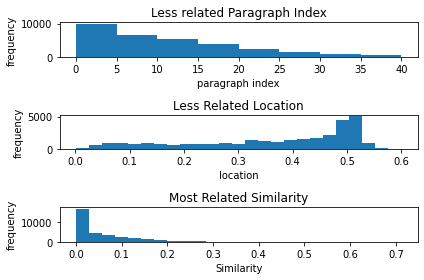

In [ ]:
print('total acticles: ', len(max_sim))

plt.subplot(3, 1, 1)
plt.hist([d['index'] for d in min_sim], bins = [0,5,10,15,20,25,30,35,40])
plt.title('Less related Paragraph Index')
plt.xlabel('paragraph index')
plt.ylabel('frequency')


plt.subplot(3, 1, 2)
plt.hist([d['ratio'] for d in min_sim], bins = 25)
plt.title('Less Related Location')
plt.xlabel('location')
plt.ylabel('frequency')

plt.subplot(3, 1, 3)
plt.hist([d['similarity'] for d in min_sim], bins = 25)
plt.title('Most Related Similarity')
plt.xlabel('Similarity')
plt.ylabel('frequency')

print('avg index: ', np.array([d['index'] for d in min_sim]).mean())
print('avg ratio: ', np.array([d['ratio'] for d in min_sim]).mean())
print('std of ratio: ', np.array([d['ratio'] for d in min_sim]).std())

plt.tight_layout()
plt.show()

total acticles:  31941
avg index:  8.30453022760715
avg ratio:  0.2905621160600209
std of ratio:  0.14044082067237573


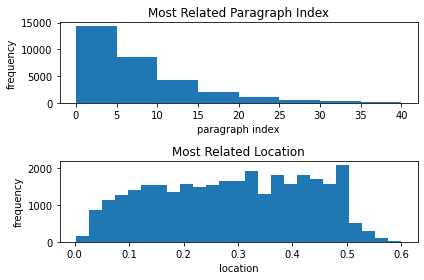

In [ ]:
print('total acticles: ', len(sec_max_sim))

plt.subplot(2, 1, 1)
plt.hist([d['index'] for d in sec_max_sim], bins = [0,5,10,15,20,25,30,35,40])
plt.title('Most Related Paragraph Index')
plt.xlabel('paragraph index')
plt.ylabel('frequency')


plt.subplot(2, 1, 2)
plt.hist([d['ratio'] for d in sec_max_sim], bins = 25)
plt.title('Most Related Location')
plt.xlabel('location')
plt.ylabel('frequency')

print('avg index: ', np.array([d['index'] for d in sec_max_sim]).mean())
print('avg ratio: ', np.array([d['ratio'] for d in sec_max_sim]).mean())
print('std of ratio: ', np.array([d['ratio'] for d in sec_max_sim]).std())

plt.tight_layout()
plt.show()